In [4]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC

import warnings
# suppress some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

print(mda.Universe(PSF, DCD))
print("Using MDAnalysis version", mda.__version__)

%matplotlib inline

<Universe with 3341 atoms>
Using MDAnalysis version 2.6.1


In [23]:
psf = mda.Universe(PSF)
print(psf)
print(hasattr(psf, 'trajectory'))


<Universe with 3341 atoms>
False


In [27]:
gro = mda.Universe(GRO)
print(gro)
print(len(gro.trajectory))

#test
print(hasattr(gro,'trajectory'))

<Universe with 47681 atoms>
1
True


In [28]:
# test
mydcd = mda.Universe(DCD)
print(mydcd)
print(len(mydcd.trajectory))

#test
print(hasattr(mydcd,'trajectory'))

<Universe with 3341 atoms>
98
True


In [7]:
u = mda.Universe(PSF, DCD)
print(u)
print(len(u.trajectory))

<Universe with 3341 atoms>
98


In [31]:
#test
# myu = mda.Universe(DCD,GRO)
# print(myu)
# print(len(myu.trajectory))

#error msg

In [9]:
print(u.residues)

<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>, <Residue ILE, 3>, ..., <Residue ILE, 212>, <Residue LEU, 213>, <Residue GLY, 214>]>


In [10]:
u.atoms


<AtomGroup with 3341 atoms>

In [11]:
last_five = u.atoms[-5:]
print(last_five)

<AtomGroup [<Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>


In [12]:
print(last_five[[0, 3, -1, 1, 3, 0]])

<AtomGroup [<Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>]>


In [13]:
print(u.select_atoms('resname ASP or resname GLU'))

<AtomGroup [<Atom 318: N of type 54 of resname GLU, resid 22 and segid 4AKE>, <Atom 319: HN of type 1 of resname GLU, resid 22 and segid 4AKE>, <Atom 320: CA of type 22 of resname GLU, resid 22 and segid 4AKE>, ..., <Atom 3271: OE2 of type 72 of resname GLU, resid 210 and segid 4AKE>, <Atom 3272: C of type 20 of resname GLU, resid 210 and segid 4AKE>, <Atom 3273: O of type 70 of resname GLU, resid 210 and segid 4AKE>]>


In [14]:
print(u.select_atoms('resid 50-100').n_residues)
print(u.residues[50:100].n_residues)

51
50


In [15]:
u.select_atoms("(resname GLU or resname HS*) and name CA and (resid 1:100)")


<AtomGroup with 6 atoms>

In [16]:
nhh = u.atoms[:3]
print(nhh.names)

['N' 'HT1' 'HT2']


In [17]:
angle_nhh = nhh.angle
print(f"N-H-H angle: {angle_nhh.value():.2f}")

N-H-H angle: 37.99


In [18]:
hnh = u.atoms[[1, 0, 2]]
print(hnh.names)

['HT1' 'N' 'HT2']


In [19]:
angle_hnh = hnh.angle
print(f"N-H-H angle: {angle_hnh.value():.2f}")

N-H-H angle: 106.20


In [20]:
print(len(u.trajectory))

98


In [21]:
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print(f"Frame: {ts.frame:3d}, Time: {time:4.0f} ps, Rgyr: {rgyr:.4f} A")

Frame:   0, Time:    1 ps, Rgyr: 16.6690 A
Frame:   1, Time:    2 ps, Rgyr: 16.6732 A
Frame:   2, Time:    3 ps, Rgyr: 16.7315 A
Frame:   3, Time:    4 ps, Rgyr: 16.7223 A
Frame:   4, Time:    5 ps, Rgyr: 16.7440 A
Frame:   5, Time:    6 ps, Rgyr: 16.7185 A
Frame:   6, Time:    7 ps, Rgyr: 16.7741 A
Frame:   7, Time:    8 ps, Rgyr: 16.7764 A
Frame:   8, Time:    9 ps, Rgyr: 16.7894 A
Frame:   9, Time:   10 ps, Rgyr: 16.8289 A
Frame:  10, Time:   11 ps, Rgyr: 16.8521 A
Frame:  11, Time:   12 ps, Rgyr: 16.8549 A
Frame:  12, Time:   13 ps, Rgyr: 16.8723 A
Frame:  13, Time:   14 ps, Rgyr: 16.9108 A
Frame:  14, Time:   15 ps, Rgyr: 16.9494 A
Frame:  15, Time:   16 ps, Rgyr: 16.9810 A
Frame:  16, Time:   17 ps, Rgyr: 17.0033 A
Frame:  17, Time:   18 ps, Rgyr: 17.0196 A
Frame:  18, Time:   19 ps, Rgyr: 17.0784 A
Frame:  19, Time:   20 ps, Rgyr: 17.1265 A


In [32]:
frame = u.trajectory.frame
time = u.trajectory.time
rgyr = u.atoms.radius_of_gyration()
print("Frame: {:3d}, Time: {:4.0f} ps, Rgyr: {:.4f} A".format(frame, time, rgyr))

Frame:   0, Time:    1 ps, Rgyr: 16.6690 A


In [33]:
rgyr = []
time = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(protein.radius_of_gyration())

In [34]:
import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'

rgyr_df.head()

,Radius of gyration (A)
Time (ps),
1.0,16.669018
2.0,16.673217
3.0,16.731454
4.0,16.722283
5.0,16.743961


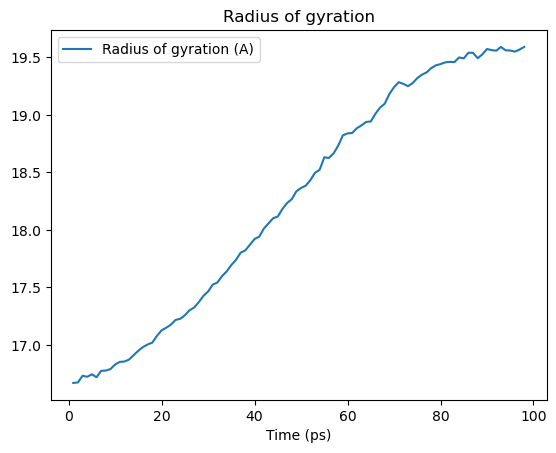

In [35]:
rgyr_df.plot(title='Radius of gyration')
plt.show()

In [36]:
from MDAnalysis.analysis import rms

In [37]:
bb = u.select_atoms('backbone')

u.trajectory[0] # first frame
first = bb.positions

u.trajectory[-1] #last frame
last = bb.positions

rms.rmsd(first, last)

6.852774844656239